# CS4168 Project
## Spotify Data Mining
* Cathal Crowe - 21320128
* Robert Flanagan - 21311625
* Mohd Humayun - 21332207
* Steven Lavelle - 21316945
* Oluwadara Fatoki - 21234639

# Importing Modules and Dataset

In [138]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config, manifold, cluster, preprocessing
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.pipeline import Pipeline
from sklearn.cluster  import KMeans
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import (
    FunctionTransformer,
    StandardScaler,
    OneHotEncoder
)

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv("tracks.csv")

# Exploratory Data Analysis (EDA)

In [139]:
df.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [140]:
df.tail(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


In [141]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


<Axes: >

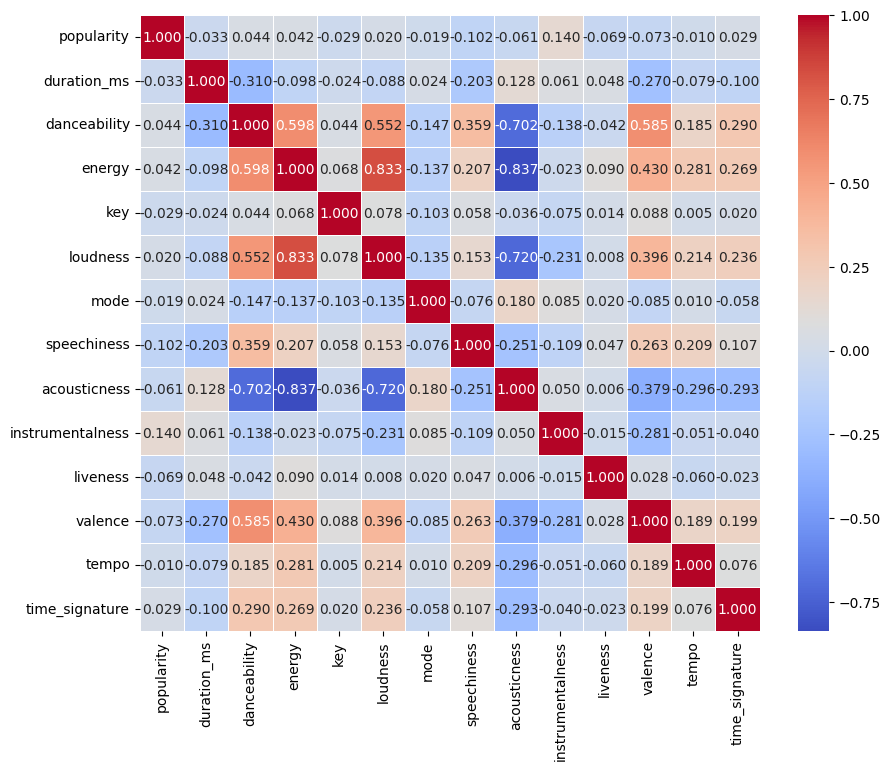

In [142]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

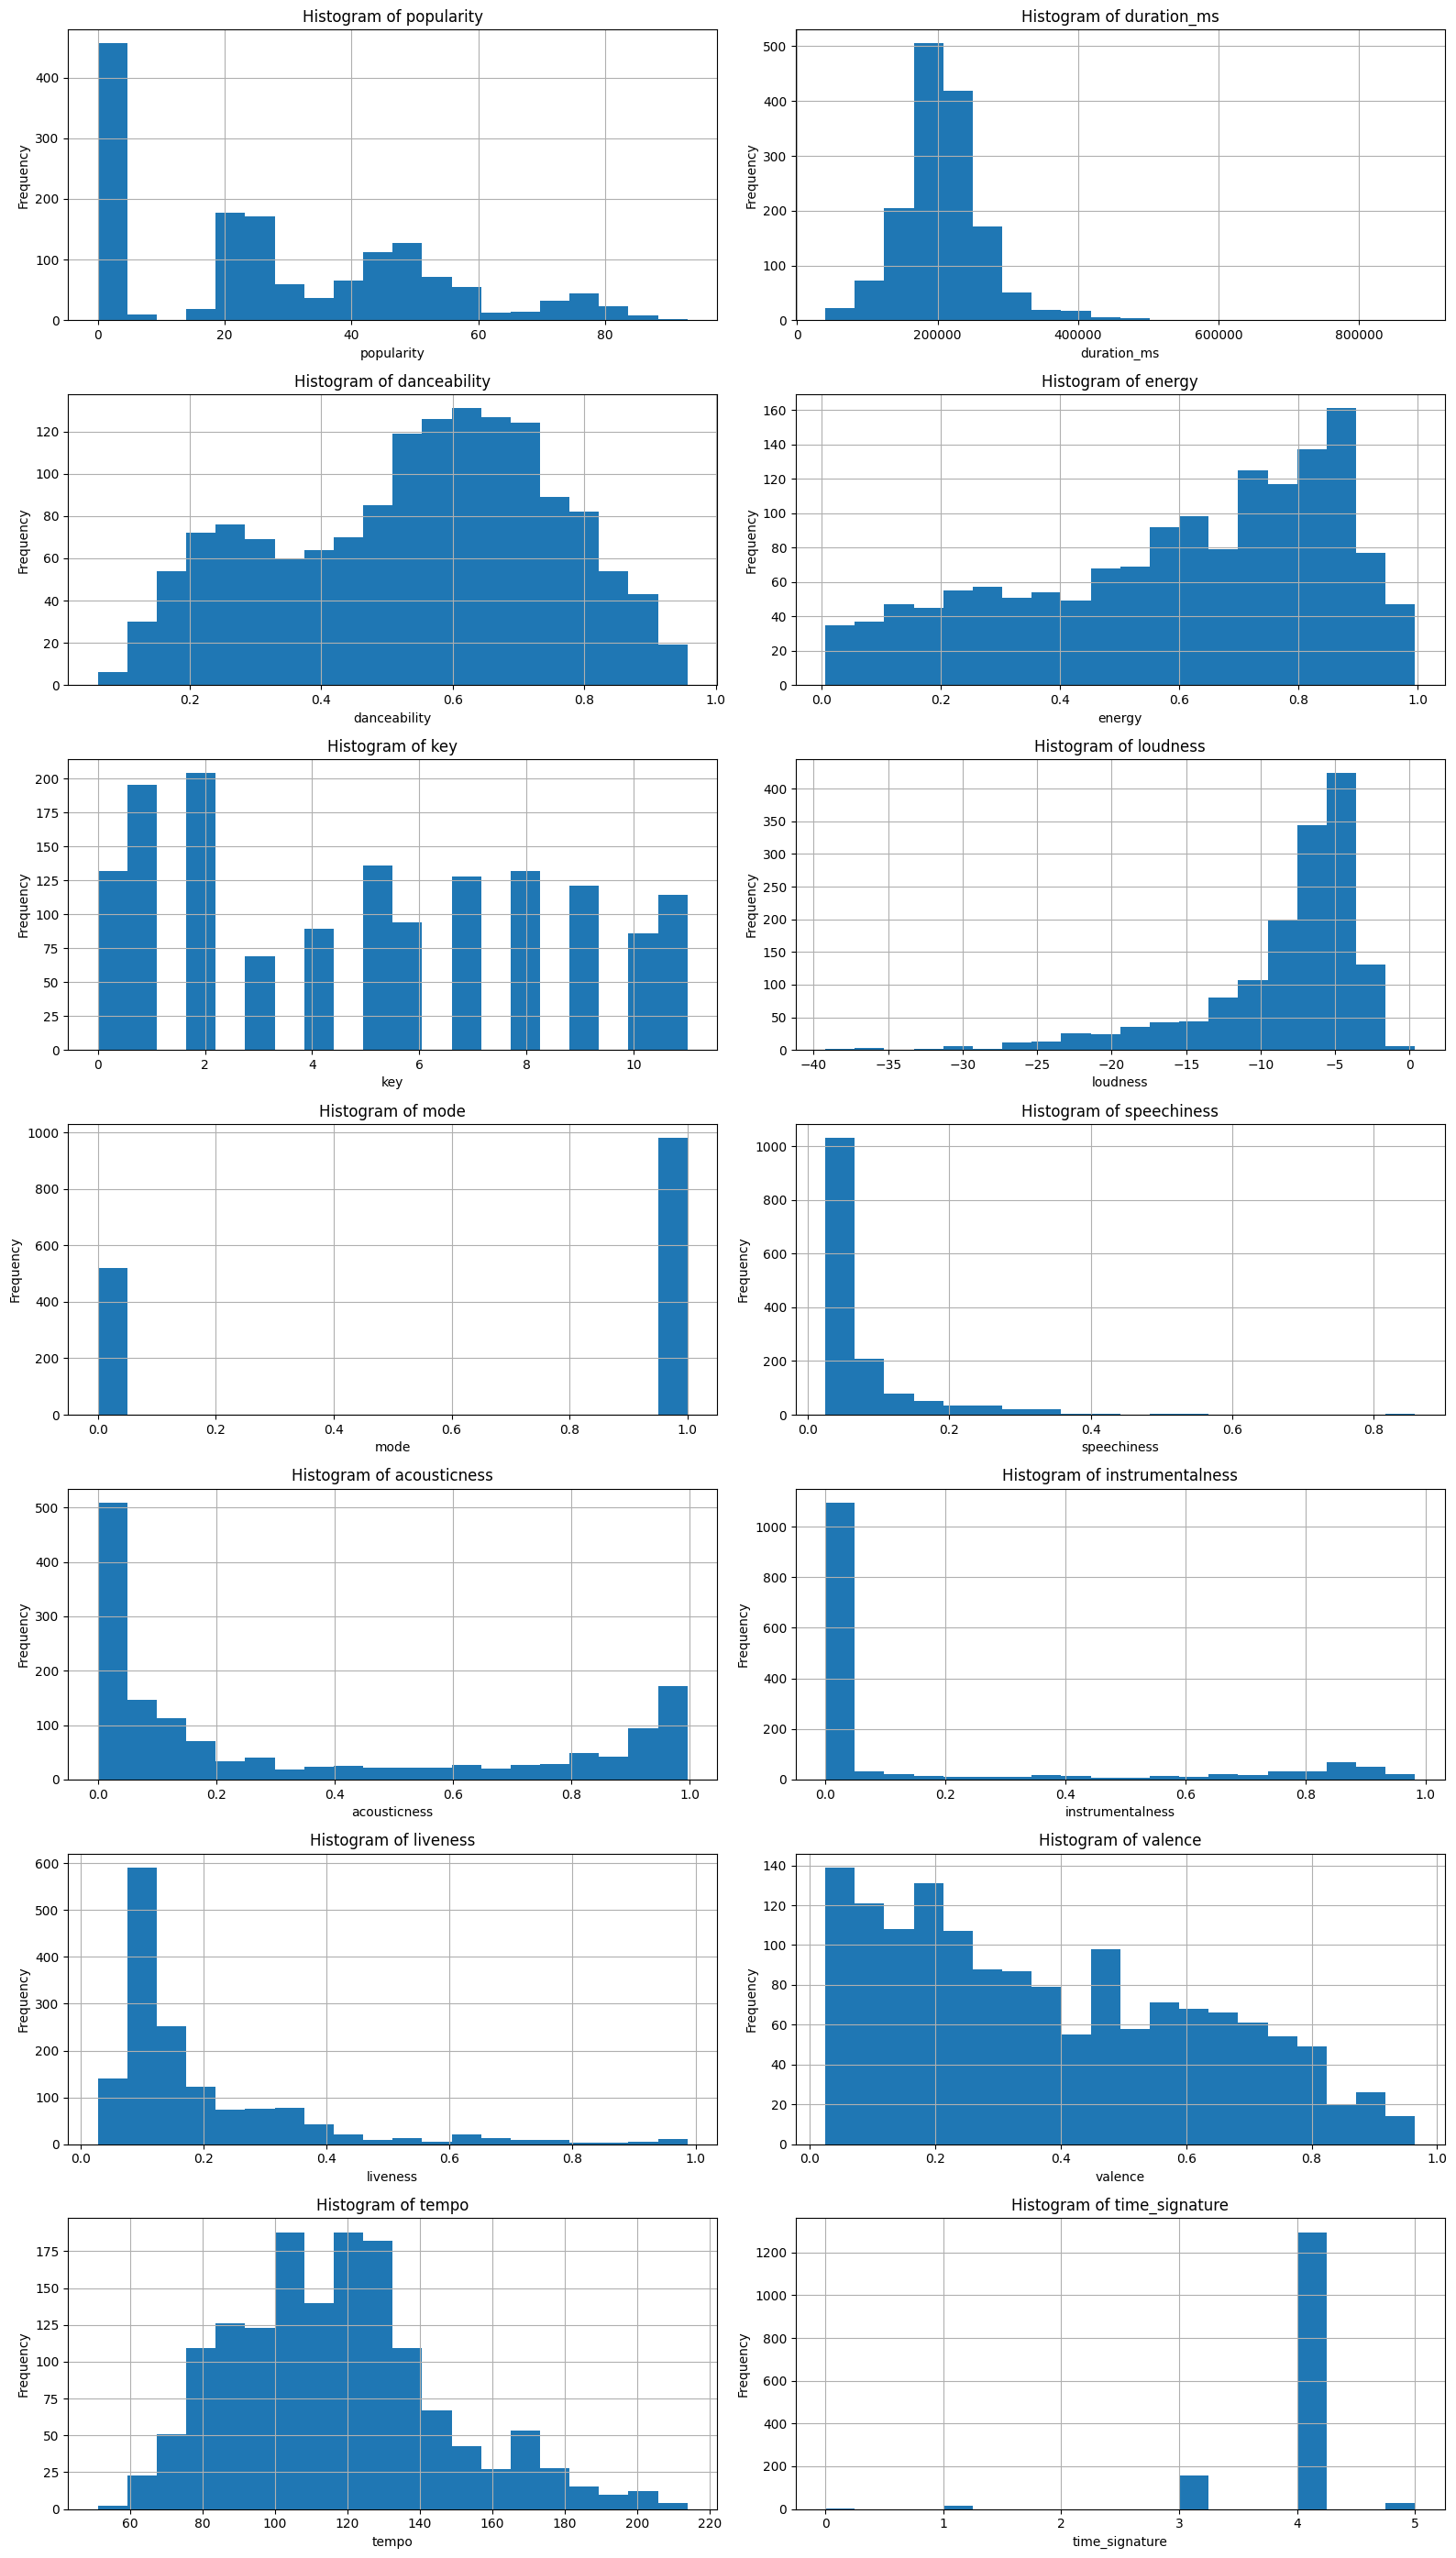

In [143]:

# List of features to plot
features = [
    "popularity", "duration_ms", "danceability", "energy", "key", "loudness",
    "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "time_signature"
]

# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()

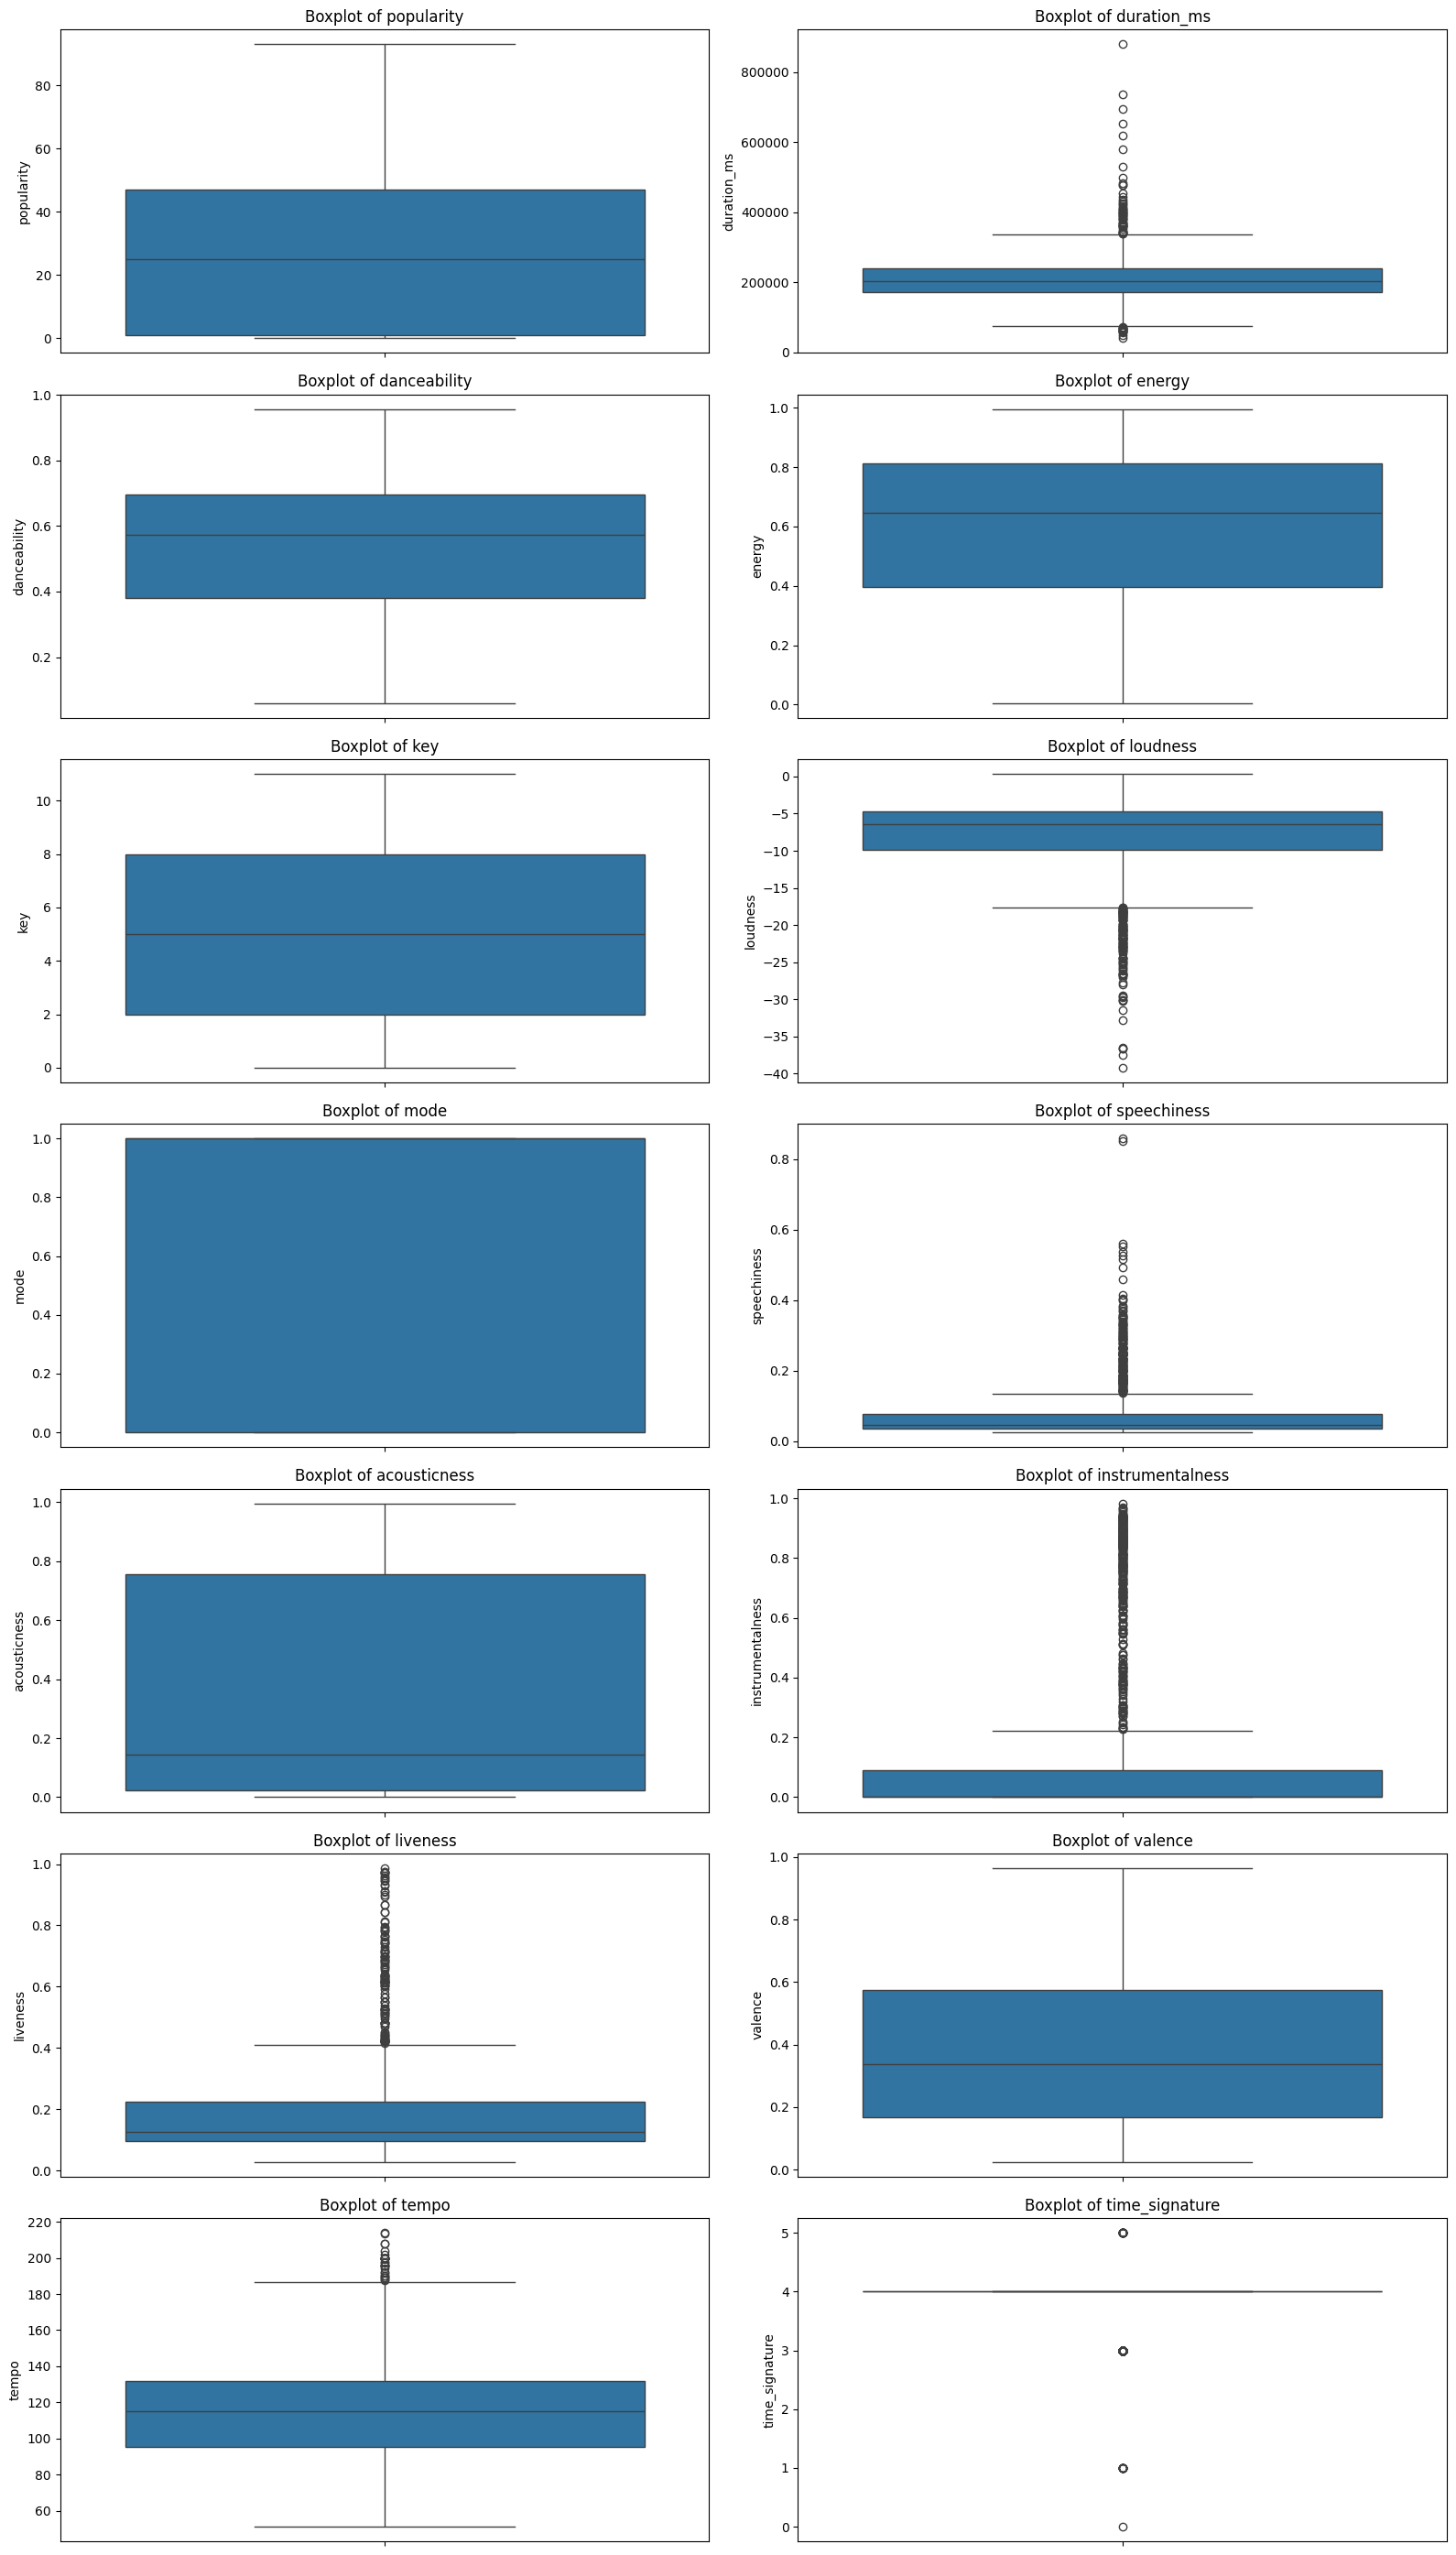

In [144]:
# Calculate the number of rows needed for 2 columns per row
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size
fig = plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(f"Boxplot of {feature}")
    ax.set_xlabel('')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

In [145]:
df['track_genre'].value_counts()

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

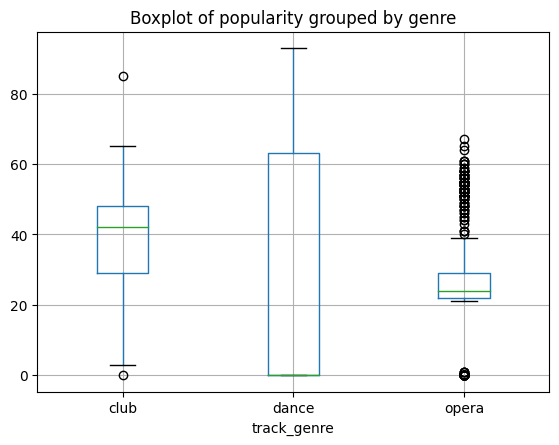

In [146]:
df.boxplot(column='popularity', by='track_genre')
plt.title('Boxplot of popularity grouped by genre')
plt.suptitle("")
plt.show()

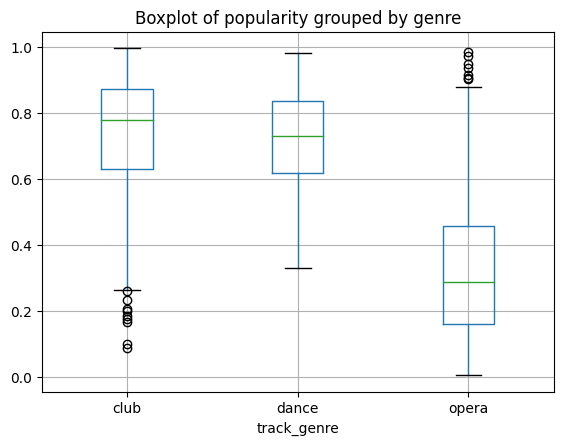

In [147]:
df.boxplot(column='energy', by='track_genre')
plt.title('Boxplot of popularity grouped by genre')
plt.suptitle("")
plt.show()

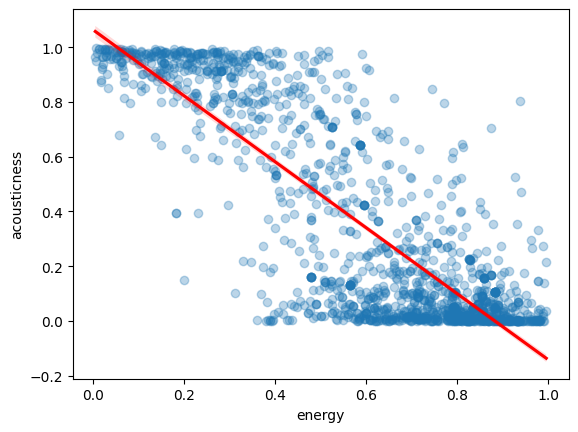

In [148]:
sns.regplot(data=df, x='energy', y='acousticness', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.show()

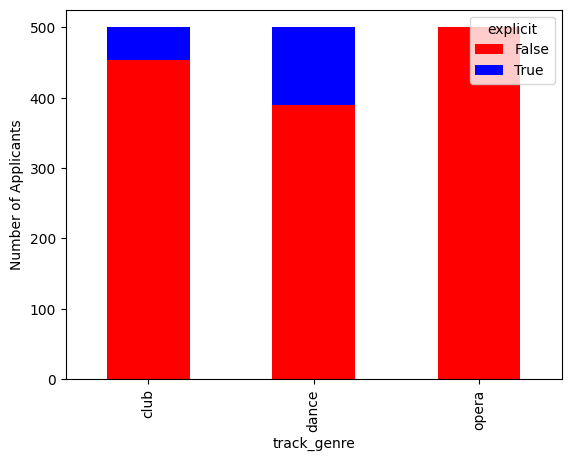

In [149]:
crosstab_CGL = pd.crosstab([ df['track_genre']], df['explicit'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

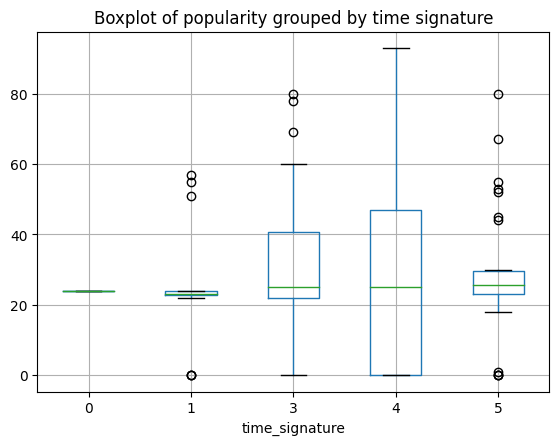

In [150]:
df.boxplot(column='popularity', by='time_signature')
plt.title('Boxplot of popularity grouped by time signature')
plt.suptitle("")
plt.show()

In [151]:
df['time_signature'].value_counts()

time_signature
4    1295
3     158
5      30
1      16
0       1
Name: count, dtype: int64

In [152]:
df['key'].value_counts()

key
2     204
1     195
5     136
0     132
8     132
7     128
9     121
11    114
6      94
4      89
10     86
3      69
Name: count, dtype: int64

In [153]:
df['mode'].value_counts()

mode
1    981
0    519
Name: count, dtype: int64

In [154]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [155]:
df.value_counts('track_genre')

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

# Data preparation

In [156]:
one_hot = pd.get_dummies(df['track_genre'])
df = df.join(one_hot)
df = df.drop(columns=['track_genre'])


In [157]:
print(df.head())


   popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          85       202093      True         0.658   0.671    2   -12.210   
1          49       215973     False         0.627   0.505    6   -12.659   
2          65       188160     False         0.807   0.835    9    -6.849   
3          59       233965     False         0.748   0.549    6    -5.447   
4          55       187173     False         0.683   0.869    0    -4.828   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0363       0.09330          0.000927    0.1150    0.166   
1     1       0.0549       0.19700          0.014900    0.0583    0.146   
2     0       0.0631       0.00148          0.527000    0.2330    0.349   
3     0       0.0650       0.00268          0.792000    0.1960    0.197   
4     1       0.0515       0.00088          0.836000    0.2060    0.219   

     tempo  time_signature  club  dance  opera  
0  100.966               4  True  Fal

In [158]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
club                0
dance               0
opera               0
dtype: int64

In [159]:
df['time_signature'] = df['time_signature']/5
df['key'] = df['key']/11

In [160]:
# 1) define your feature lists and preprocessor exactly as before
skewed_feats  = ["duration_ms","tempo","liveness",
                 "instrumentalness","speechiness","acousticness","popularity"]
cube_feats    = ["loudness"]
simple_feats  = ["danceability","energy","valence"]

skew_pipe = Pipeline([
    ("log1p",    FunctionTransformer(np.log1p, validate=False)),
    ("scaler",   StandardScaler())
])
cube_pipe = Pipeline([
    ("cuberoot", FunctionTransformer(np.cbrt,   validate=False)),
    ("scaler",   StandardScaler())
])
simple_pipe = Pipeline([
    ("scaler",   StandardScaler())
])

preprocessor = ColumnTransformer([
    ("skewed", skew_pipe,   skewed_feats),
    ("cube",   cube_pipe,   cube_feats),
    ("simple", simple_pipe, simple_feats),
])

# 2) apply it in‑place to df
num_cols = skewed_feats + cube_feats + simple_feats

# fit & transform
X_trans = preprocessor.fit_transform(df[num_cols])

# put it straight back into the original DataFrame
df[num_cols] = X_trans

# now your df has those columns replaced by their log/cube‑root + scaled versions
print(df[num_cols].describe().loc[['mean','std']])


       duration_ms         tempo      liveness  instrumentalness  \
mean -2.160050e-15 -2.065311e-15 -3.789561e-17      1.894781e-17   
std   1.000334e+00  1.000334e+00  1.000334e+00      1.000334e+00   

       speechiness  acousticness    popularity      loudness  danceability  \
mean  3.789561e-17  1.136868e-16  1.705303e-16 -4.926430e-16  7.579123e-17   
std   1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00  1.000334e+00   

            energy       valence  
mean -3.789561e-17 -1.515825e-16  
std   1.000334e+00  1.000334e+00  


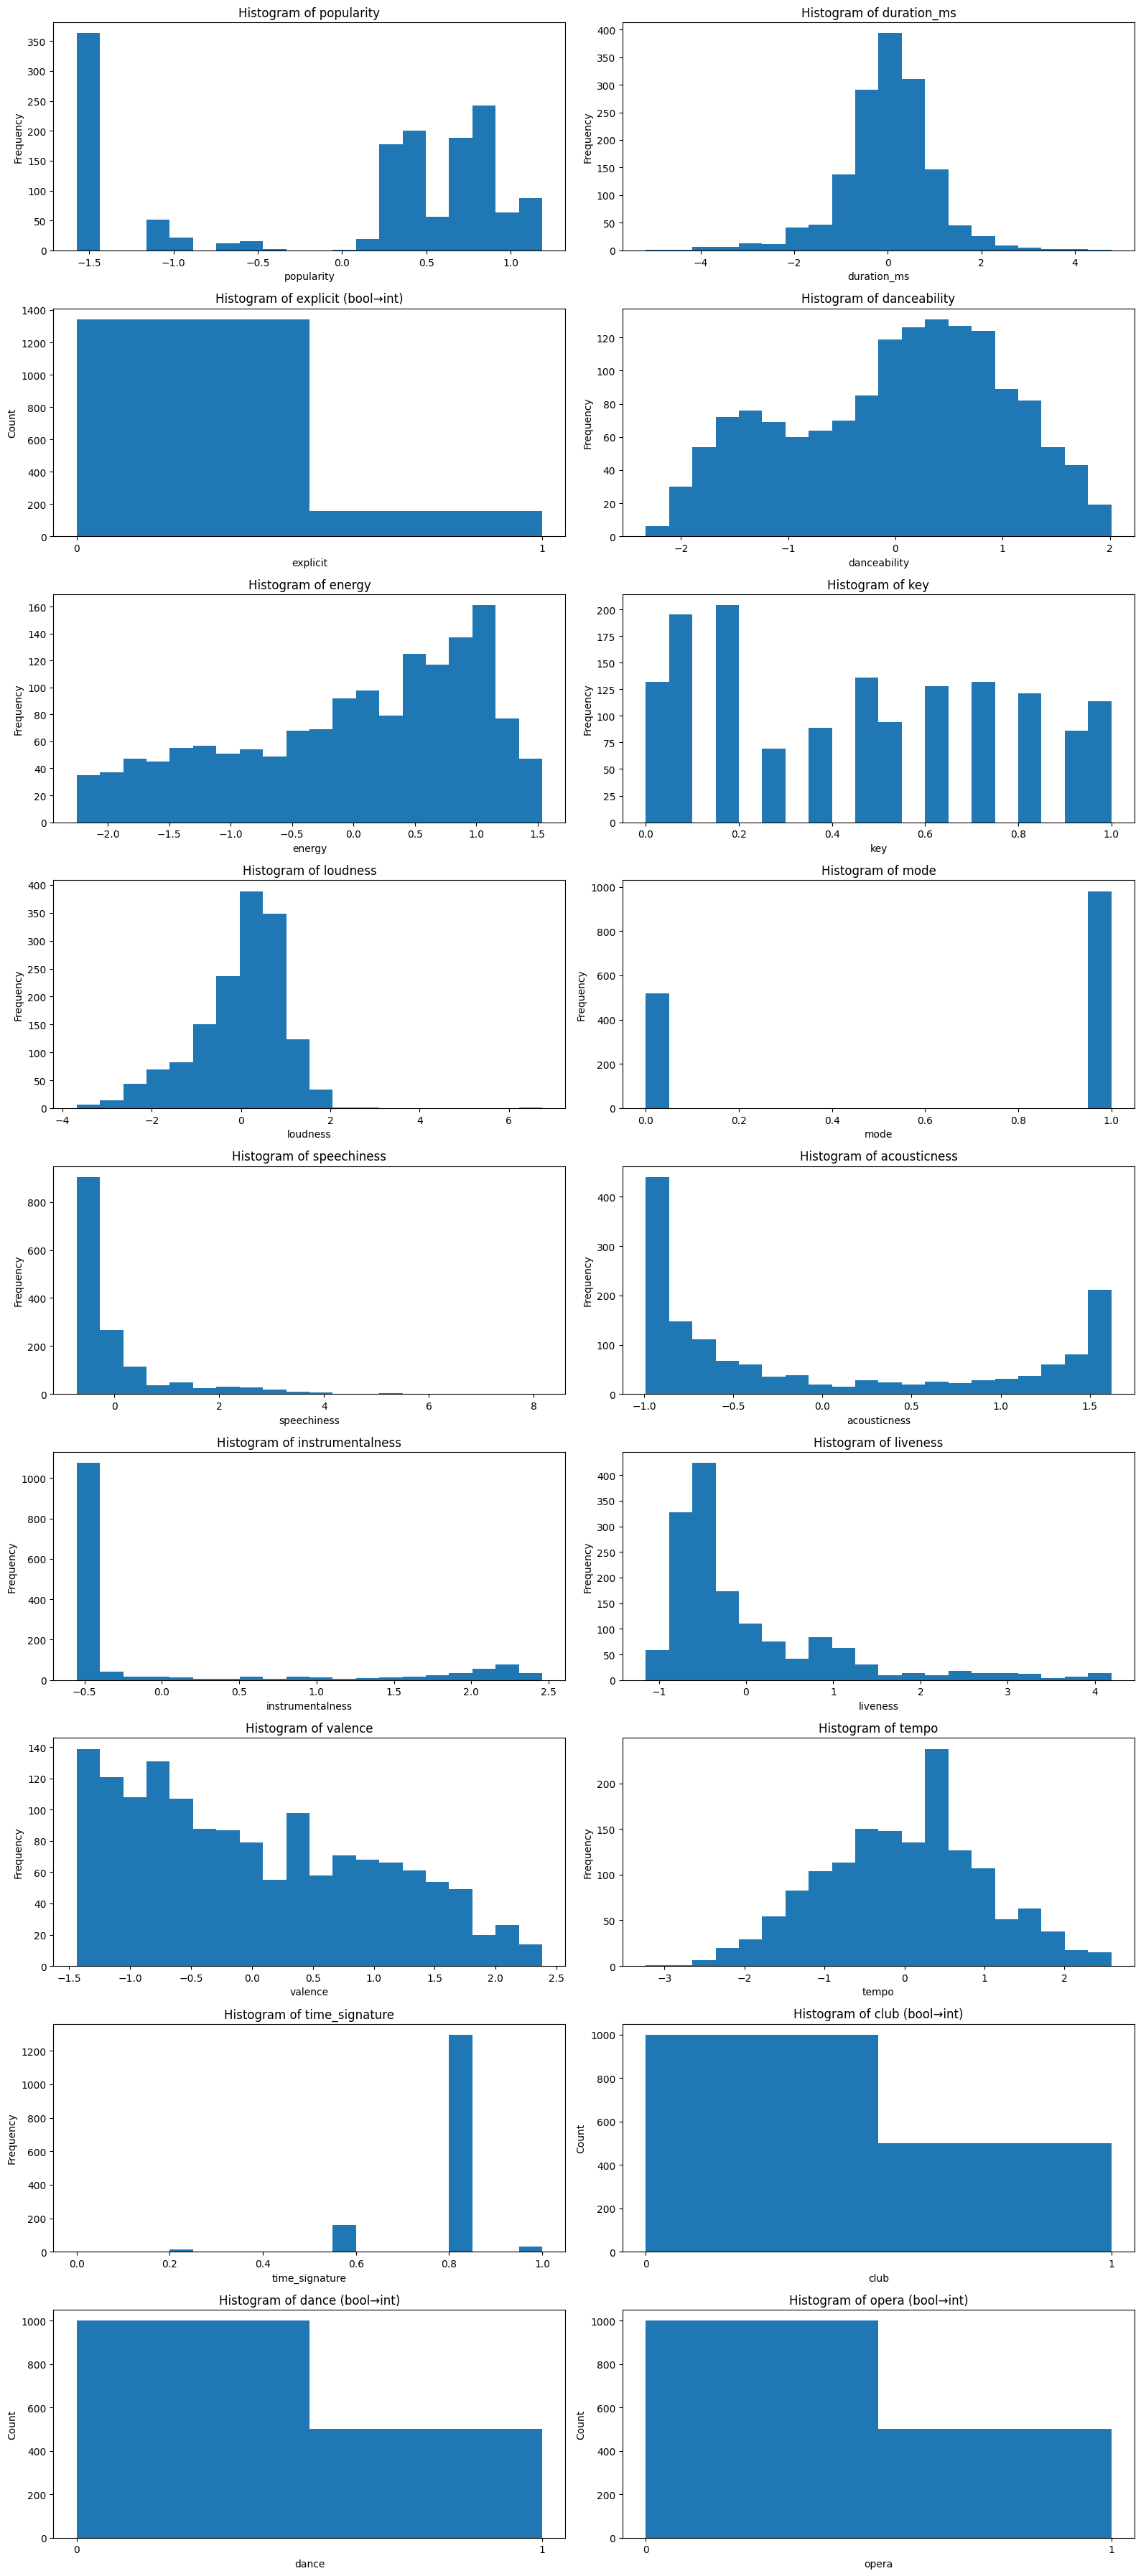

In [161]:
# 1) List all columns
features_all = df.columns.tolist()

# 2) Compute rows for 2‐column layout
num_rows = math.ceil(len(features_all) / 2)

# 3) Create the subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows), squeeze=False)
axes = axes.flatten()

# 4) Loop through every column
for i, feat in enumerate(features_all):
    ax = axes[i]
    series = df[feat]

    # If it's boolean, cast to int before histogram
    if series.dtype == "bool":
        ax.hist(series.astype(int), bins=2)
        ax.set_xticks([0,1])
        ax.set_title(f"Histogram of {feat} (bool→int)")
        ax.set_xlabel(feat)
        ax.set_ylabel("Count")

    # If it's non‑numeric (object or category), do a bar chart of value counts
    elif not np.issubdtype(series.dtype, np.number):
        vc = series.value_counts()
        ax.bar(vc.index.astype(str), vc.values)
        ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")
        ax.set_title(f"Bar chart of {feat}")
        ax.set_ylabel("Count")

    # Otherwise it’s numeric: do a histogram
    else:
        ax.hist(series, bins=20)
        ax.set_title(f"Histogram of {feat}")
        ax.set_xlabel(feat)
        ax.set_ylabel("Frequency")

# 5) Turn off any unused axes (if you had an odd number of columns)
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [162]:
pipe_km = Pipeline([
    ("preproc", preprocessor),
    ("km",       KMeans(n_clusters=5, random_state=0))
])

pipe_clf = Pipeline([
    ("preproc", preprocessor),
    ("rf",       RandomForestClassifier())
])

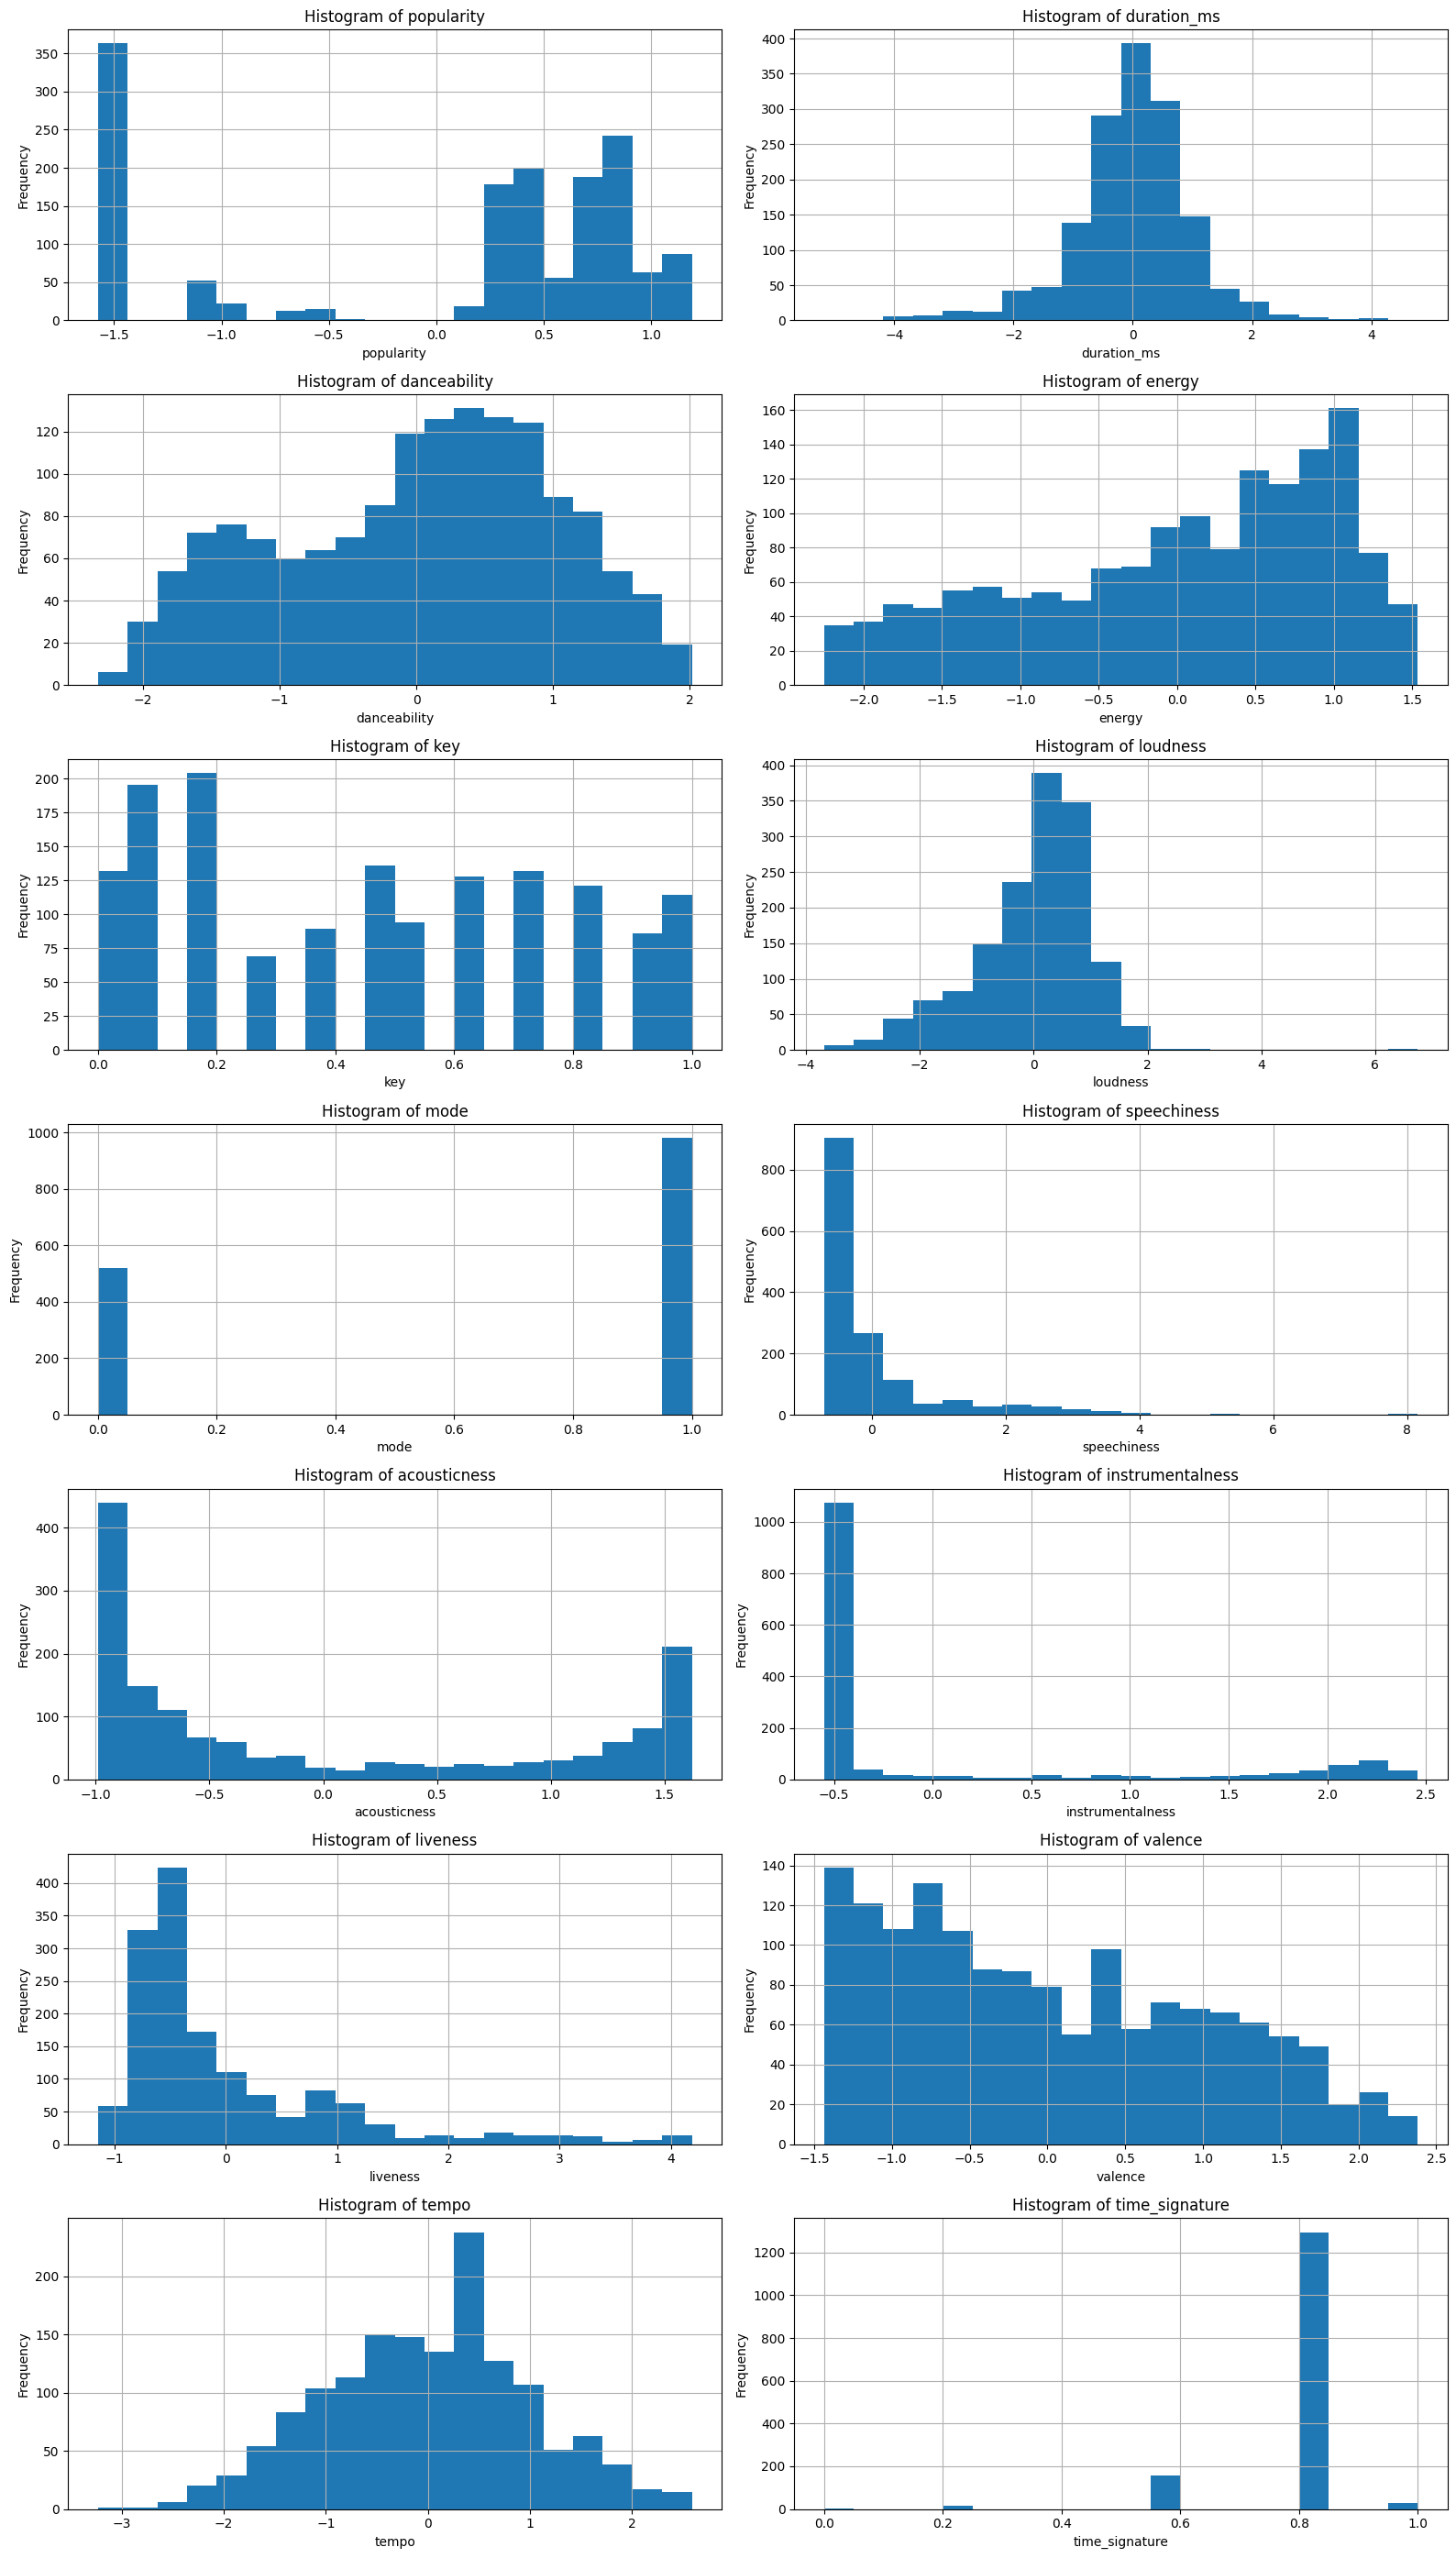

In [163]:
# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()

In [164]:
df.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,club,dance,opera
0,1.133943,0.031060,True,0.566079,0.293351,0.181818,-0.905453,1,-0.544492,-0.653528,-0.546762,-0.493394,-0.863148,-0.476074,0.8,True,False,False
1,0.804158,0.245546,False,0.416004,-0.342189,0.545455,-0.976185,1,-0.279526,-0.311185,-0.485810,-0.916223,-0.944368,-0.514974,0.8,True,False,False
2,0.972985,-0.199603,False,1.287406,0.921234,0.818182,0.118302,0,-0.164193,-0.984930,1.310269,0.321596,-0.119992,0.392661,0.8,True,False,False
3,0.915027,0.503923,False,1.001780,-0.173733,0.545455,0.472354,0,-0.137597,-0.980406,2.013846,0.074759,-0.737258,-0.473376,0.8,True,False,False
4,0.873073,-0.216585,False,0.687107,1.051405,0.000000,0.648243,1,-0.327610,-0.987194,2.120494,0.142217,-0.647917,0.360054,0.8,True,False,False


In [165]:
df = df.drop(columns=['club', 'dance', 'opera'])

In [166]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [167]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
kmeans.fit(df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [168]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=100).fit(df)

In [169]:
data_and_centers = np.r_[df,clustered_data_sklearn.cluster_centers_]

In [170]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


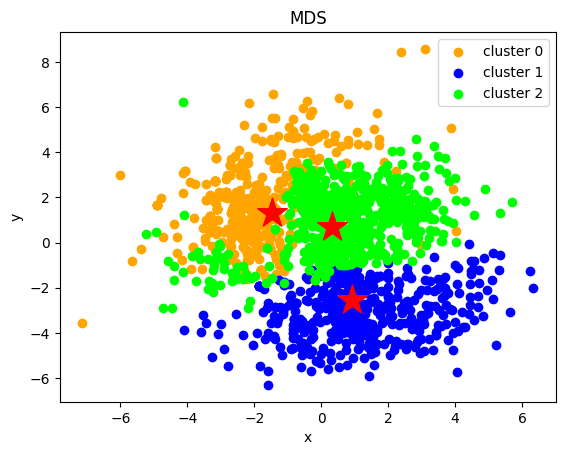

In [171]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [172]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


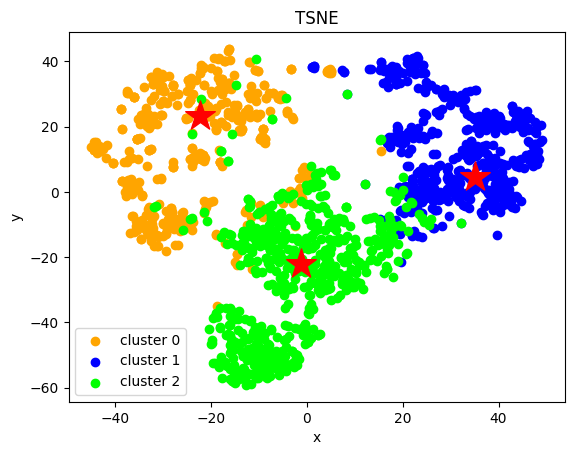

In [173]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

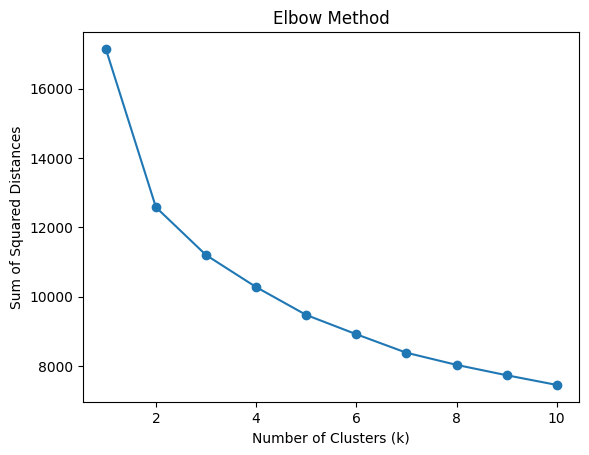

In [174]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

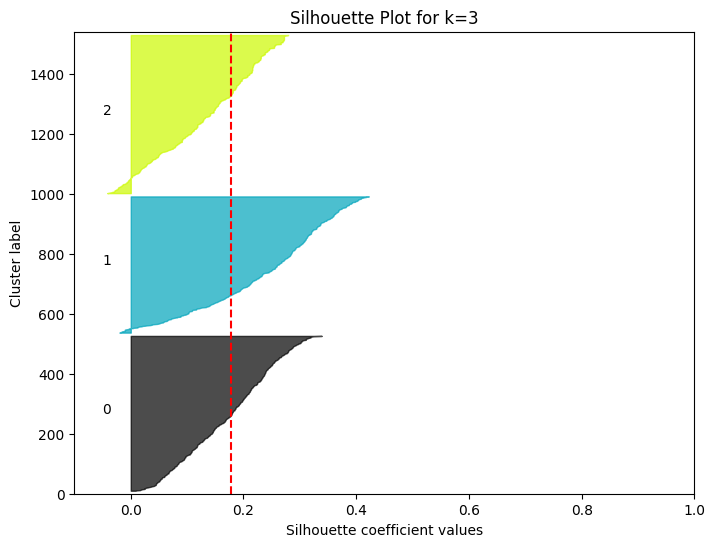

In [175]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
k = 3
silhouette_avg = silhouette_score(df, labels)
sample_silhouette_values = silhouette_samples(df, labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df) + (k + 1) * 10]) 

y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  

ax1.set_title(f"Silhouette Plot for k={k}")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

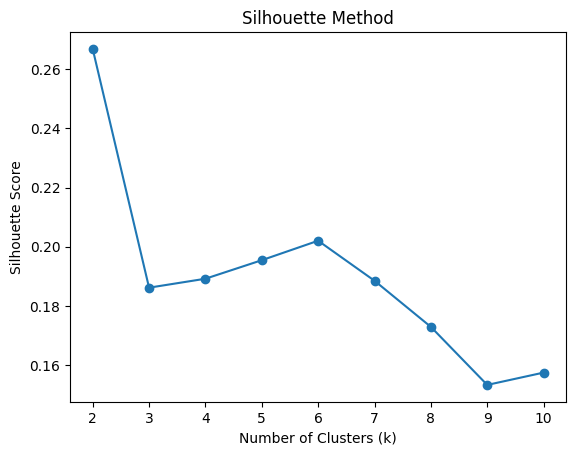

In [179]:
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

plt.figure()
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

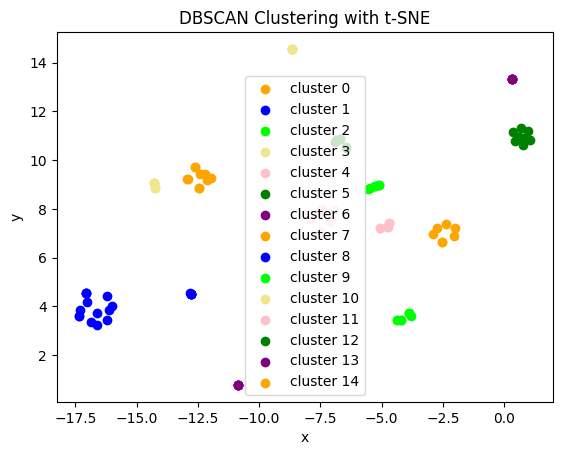

In [181]:
from sklearn.cluster import KMeans, DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(df)
tsne_coordinates = manifold.TSNE(n_components=3).fit_transform(df)
clustering_scatterplot(points=tsne_coordinates, 
                       labels=dbscan.labels_, 
                       centers=None, 
                       title='DBSCAN Clustering with t-SNE')